In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.mode.copy_on_write = True

In [2]:
#measurements for natural and damping frequencies
wn1 = 5.7513 #0g
wn2 = 5.5637 #400g
wn3 = 5.4387 #800g
wd1 = 0 #0g
wd2 = 5.1887 #400g
wd3 = 5.3137 #800g
#k and msystem values found using 2 natural frequencies each time
k12 = 192.94
m12 = 5.8331
k13 = 223.77
m13 = 6.7649
k23 = 266.31
m23 = 8.2031
#since every calculation differs, it is decided to use the averages.
m_sys = (m23+m12+m13)/3
k = (k12+k13+k23)/3
#for c calculations, similar technique is used. it is calculated from wn1 and wd1 first, then wn2 and wd2 lastly wn3 and wd3.
c1 = (1 - (wd1/wn1)**2)*2*m_sys*wn1
c2 = (1 - (wd2/wn2)**2)*2*(m_sys+0.4)*wn2
c3 = (1 - (wd3/wn3)**2)*2*(m_sys+0.8)*wn3
#avarage of these values are taken as c
c = (c1+c2+c3)/3
#zeta calculations
zeta1 = c/(2*m_sys*wn1)
zeta2 = c/(2*(m_sys+0.4)*wn2)
zeta3 = c/(2*(m_sys+0.8)*wn3)
df = pd.read_excel("data5.xlsx")
df.columns
dn1 = df[['rpm(0g natural)', 'freq. of max amp.(hz)', 'max. Amp.(g)']]
dn2 = df[['rpm(400g natural)', 'freq. of max amp.', 'max. Amp.']]
dn3 = df[['rpm(800g natural)', 'freq. of max amp..1', 'max. Amp..1']]
dd1 = df[['rpm(0g and damper)', 'freq. of max amp..2', 'max. Amp..2']]
dd2 = df[['rpm(400g and damper)', 'freq. of max amp..3', 'max. Amp..3']]
dd3 = df[['rpm(800g and damper)', 'freq. of max amp..4', 'max. Amp..4']]
#Experimental F0 calculations for each amplitude and frequency value
#undamped
dn1["F0"] = abs(m_sys*(wn1**2 - dn1["freq. of max amp.(hz)"]**2)) * dn1["max. Amp.(g)"]
dn2["F0"] = abs((m_sys+0.4)*(wn2**2 - dn2["freq. of max amp."]**2)) * dn2["max. Amp."]
dn3["F0"] = abs((m_sys+0.8)*(wn3**2 - dn3["freq. of max amp..1"]**2)) * dn3["max. Amp..1"]
#damped
dd1["F0"] = ((m_sys*(wn1**2-dd1["freq. of max amp..2"]**2))**2 + (c*dd1["freq. of max amp..2"])**2)**(1/2) * dd1["max. Amp..2"]
dd2["F0"] = (((m_sys+0.4)*(wn2**2-dd2["freq. of max amp..3"]**2))**2 + (c*dd2["freq. of max amp..3"])**2)**(1/2) * dd2["max. Amp..3"]
dd3["F0"] = (((m_sys+0.8)*(wn3**2-dd3["freq. of max amp..4"]**2))**2 + (c*dd3["freq. of max amp..4"])**2)**(1/2) * dd3["max. Amp..4"]
#evaluating F0s
dn1_f0 = dn1["F0"].mean()
dn2_f0 = dn2["F0"].mean()
dn3_f0 = dn3["F0"].mean()
dd1_f0 = dd1["F0"].mean()
dd2_f0 = dd2["F0"].mean()
dd3_f0 = dd3["F0"].mean()
print(zeta1,zeta2,zeta3,m_sys,k,c)
dn1


0.3937355380306687 0.38481220656050646 0.37329593396653893 6.933699999999999 227.67333333333332 31.40260526515745


,rpm(0g natural),freq. of max amp.(hz),max. Amp.(g),F0
0,900,4.6260,0.0220,1.781314
1,1000,5.1261,0.0430,2.027578
2,1100,5.7513,1.1400,0.000000
3,1200,6.2514,0.1054,4.386736
4,1300,6.8140,0.0670,6.203309
5,1400,7.3141,0.0410,5.804636


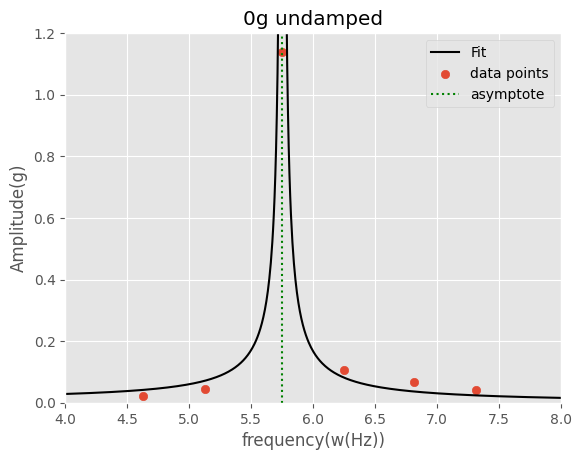

In [3]:
w_values = np.linspace(4,10,1000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values = (dn1_f0 / np.abs(m_sys * (wn1 ** 2 - w_values ** 2)))

# Plot w against X
plt.plot(w_values, X_values,color="black",label="Fit")
plt.scatter(dn1["freq. of max amp.(hz)"], dn1["max. Amp.(g)"],label="data points")
plt.axvline(x=wn1, color='green', linestyle=':',label="asymptote")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('0g undamped')
plt.legend()
plt.ylim(0, 1.2)
plt.xlim(4,8)

# Show the plot
plt.show()

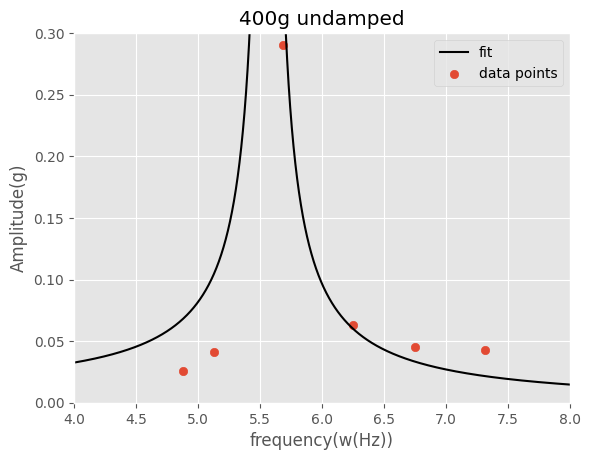

In [4]:
w_values2 = np.linspace(4,10,10000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values2 = (dn2_f0 / np.abs((m_sys+0.4) * (wn2 ** 2 - w_values2 ** 2)))

# Plot w against X
plt.plot(w_values2, X_values2,color="black",label="fit")
plt.scatter(dn2["freq. of max amp."], dn2["max. Amp."],label="data points")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('400g undamped')
plt.legend()
plt.ylim(0, 0.3)
plt.xlim(4,8)

# Show the plot
plt.show()

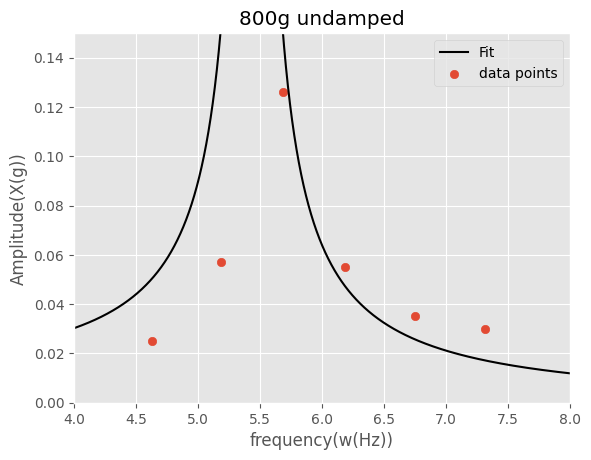

In [5]:
w_values3 = np.linspace(4,10,10000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values3 = (dn3_f0 / np.abs((m_sys+0.8) * (wn3 ** 2 - w_values3 ** 2)))

# Plot w against X
plt.plot(w_values3, X_values3,color="black",label="Fit")
plt.scatter(dn3["freq. of max amp..1"], dn3["max. Amp..1"],label="data points")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(X(g))')
plt.title('800g undamped')
plt.legend()
plt.ylim(0, 0.15)
plt.xlim(4,8)
# Show the plot
plt.show()

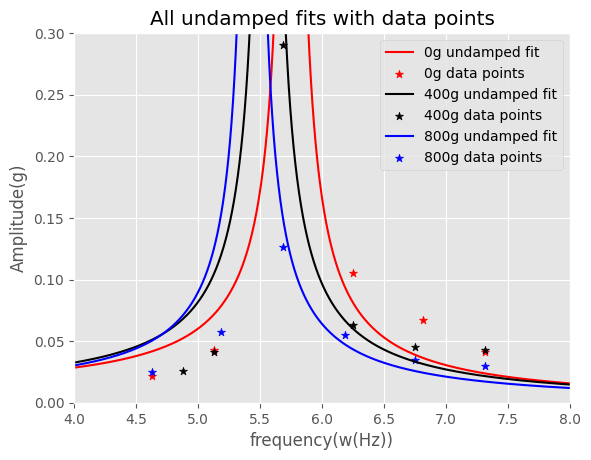

In [6]:
plt.plot(w_values, X_values,label="0g undamped fit",color="red")
plt.scatter(dn1["freq. of max amp.(hz)"], dn1["max. Amp.(g)"],label="0g data points",color="red",marker="*")
plt.plot(w_values2, X_values2,color="black",label="400g undamped fit")
plt.scatter(dn2["freq. of max amp."], dn2["max. Amp."],label="400g data points",color="black",marker="*")
plt.plot(w_values3, X_values3,color="blue",label="800g undamped fit")
plt.scatter(dn3["freq. of max amp..1"], dn3["max. Amp..1"],label="800g data points",marker="*",color="blue")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('All undamped fits with data points')
plt.legend()
plt.ylim(0, 0.3)
plt.xlim(4,8)

# Show the plot
plt.show()

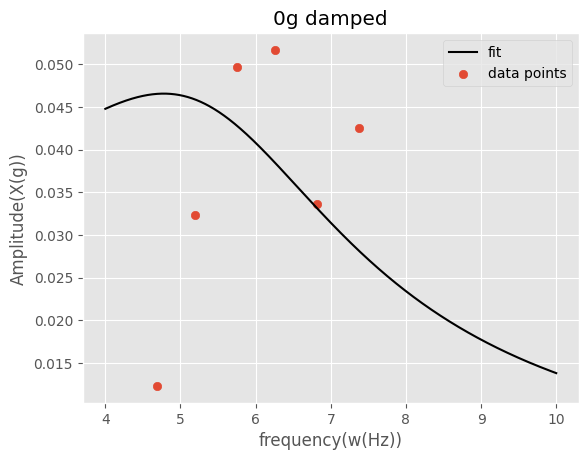

In [7]:
w_values4 = np.linspace(4,10,10000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values4 = dd1_f0 / m_sys / np.sqrt((wn1**2-w_values4**2)**2+(2*zeta1*wn1*w_values4)**2)

# Plot w against X
plt.plot(w_values4, X_values4,color="black",label="fit")
plt.scatter(dd1["freq. of max amp..2"], dd1["max. Amp..2"],label="data points")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(X(g))')
plt.title('0g damped')
plt.legend()
# Show the plot
plt.show()

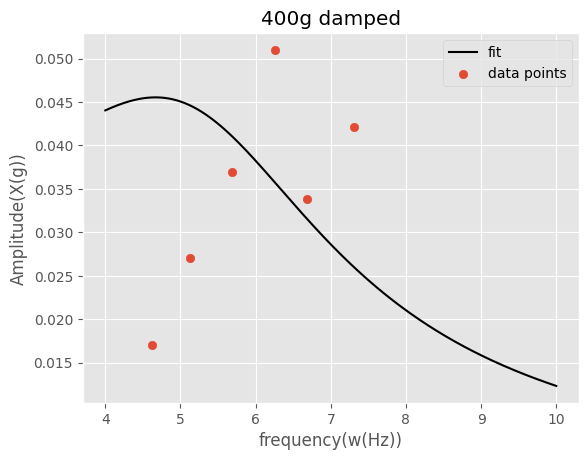

In [8]:
w_values5 = np.linspace(4,10,10000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values5 = dd2_f0 / (m_sys+0.4) / np.sqrt((wn2**2-w_values5**2)**2+(2*zeta2*wn2*w_values5)**2)

# Plot w against X
plt.plot(w_values5, X_values5,color="black",label="fit")
plt.scatter(dd2["freq. of max amp..3"], dd2["max. Amp..3"],label="data points")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(X(g))')
plt.title('400g damped')
plt.legend()

# Show the plot
plt.show()

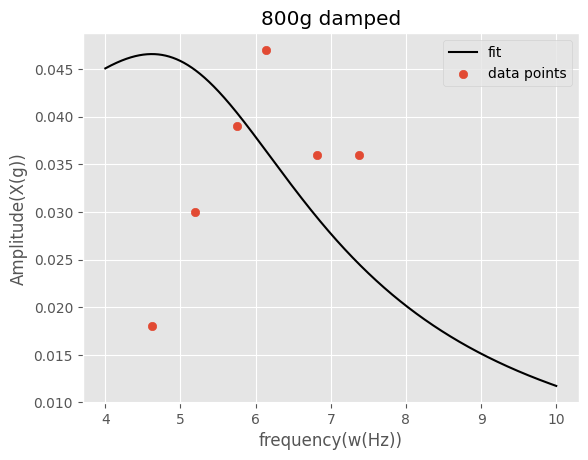

In [9]:
w_values6 = np.linspace(4,10,10000)  # Adjust the range as needed

# Calculate X using the provided formula
X_values6 = dd3_f0 / (m_sys+0.8) / np.sqrt((wn3**2-w_values6**2)**2+(2*zeta3*wn3*w_values6)**2)

# Plot w against X
plt.plot(w_values6, X_values6,color="black",label="fit")
plt.scatter(dd3["freq. of max amp..4"], dd3["max. Amp..4"],label="data points")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(X(g))')
plt.title('800g damped')
plt.legend()
# Show the plot
plt.show()

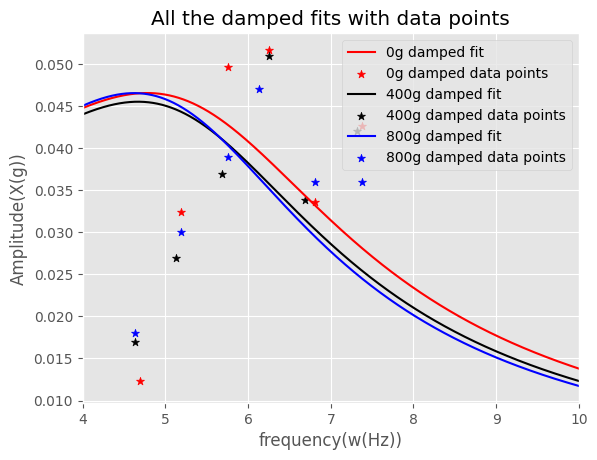

In [10]:
plt.plot(w_values4, X_values4,color="red",label="0g damped fit")
plt.scatter(dd1["freq. of max amp..2"], dd1["max. Amp..2"],label="0g damped data points",color="red",marker="*")
plt.plot(w_values5, X_values5,color="black",label="400g damped fit")
plt.scatter(dd2["freq. of max amp..3"], dd2["max. Amp..3"],label="400g damped data points",color="black",marker="*")
plt.plot(w_values6, X_values6,color="blue",label="800g damped fit")
plt.scatter(dd3["freq. of max amp..4"], dd3["max. Amp..4"],label="800g damped data points",color="blue",marker="*")
plt.xlim(4,10)

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(X(g))')
plt.title('All the damped fits with data points')
plt.legend()
# Show the plot
plt.show()

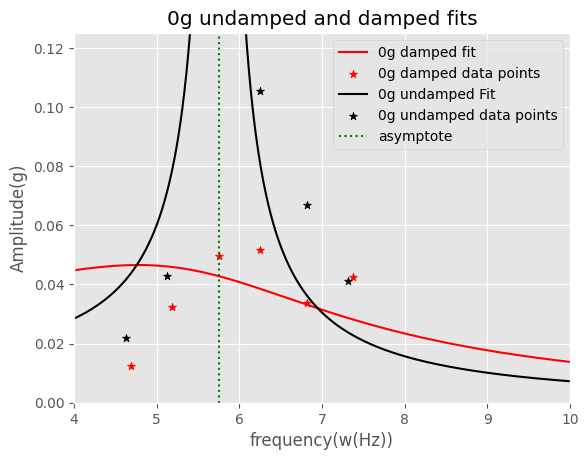

In [11]:
plt.plot(w_values4, X_values4,color="red",label="0g damped fit")
plt.scatter(dd1["freq. of max amp..2"], dd1["max. Amp..2"],label="0g damped data points",color="red",marker="*")
plt.plot(w_values, X_values,color="black",label="0g undamped Fit")
plt.scatter(dn1["freq. of max amp.(hz)"], dn1["max. Amp.(g)"],label="0g undamped data points",marker="*",color="black")
plt.axvline(x=wn1, color='green', linestyle=':',label="asymptote")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('0g undamped and damped fits')
plt.legend()
plt.ylim(0, 0.125)
plt.xlim(4,10)

# Show the plot
plt.show()

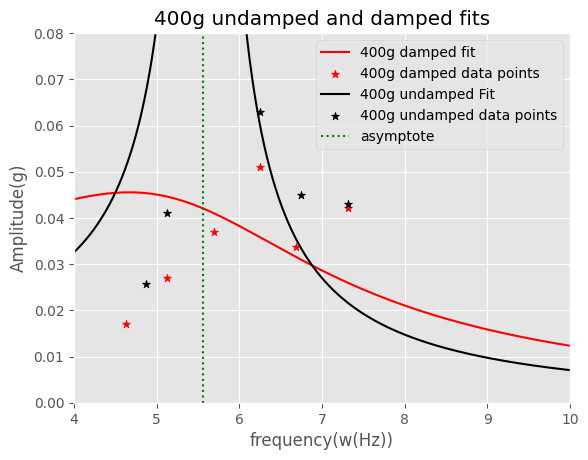

In [12]:
plt.plot(w_values5, X_values5,color="red",label="400g damped fit")
plt.scatter(dd2["freq. of max amp..3"], dd2["max. Amp..3"],label="400g damped data points",color="red",marker="*")
plt.plot(w_values2, X_values2,color="black",label="400g undamped Fit")
plt.scatter(dn2["freq. of max amp."], dn2["max. Amp."],label="400g undamped data points",marker="*",color="black")
plt.axvline(x=wn2, color='green', linestyle=':',label="asymptote")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('400g undamped and damped fits')
plt.legend()
plt.ylim(0, 0.08)
plt.xlim(4,10)

# Show the plot
plt.show()

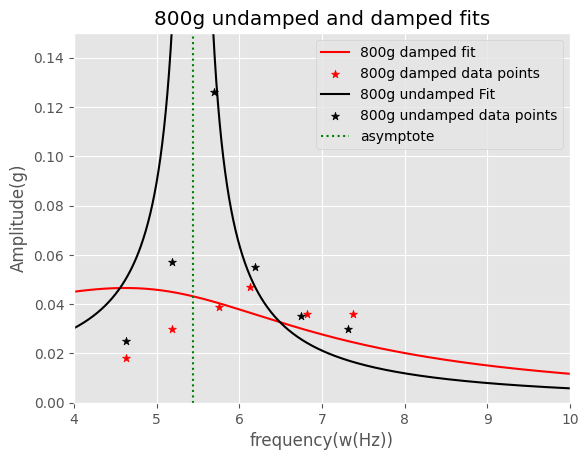

In [13]:
plt.plot(w_values6, X_values6,color="red",label="800g damped fit")
plt.scatter(dd3["freq. of max amp..4"], dd3["max. Amp..4"],label="800g damped data points",color="red",marker="*")
plt.plot(w_values3, X_values3,color="black",label="800g undamped Fit")
plt.scatter(dn3["freq. of max amp..1"], dn3["max. Amp..1"],label="800g undamped data points",marker="*",color="black")
plt.axvline(x=wn3, color='green', linestyle=':',label="asymptote")

# Add labels and legend
plt.xlabel('frequency(w(Hz))')
plt.ylabel('Amplitude(g)')
plt.title('800g undamped and damped fits')
plt.legend()
plt.ylim(0,0.15)
plt.xlim(4,10)
# Show the plot
plt.show()